<a href="https://colab.research.google.com/github/justjstine/CCADMACL_EXERCISES_COM232/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [7]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [8]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [10]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [11]:
df.drop('country', axis=1, inplace=True)
df_numeric = df.select_dtypes(include=[np.number])

In [12]:
df1 = df_numeric.copy()

df1['Health_Score'] = (df1['child_mort'] / df['child_mort'].mean() + df['health'] / df['health'].mean() + df['life_expec'] / df['life_expec'].mean() + df['total_fer'] / df['total_fer'].mean())
df1['Trade_Score'] = (df1['imports'] / df['imports'].mean() + df['exports'] / df['exports'].mean())
df1['Economics_Score'] = (df1['gdpp'] / df['gdpp'].mean() + df['income'] / df['income'].mean() + df['inflation'] / df['inflation'].mean())

print(df1.head())


   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  Health_Score  Trade_Score  Economics_Score  
0       5.82    553      6.239852     1.200812         1.349645  
1       1.65   4090      3.035901     1.717580         1.471658  
2       2.89   4460      3.389763     1.603752         3.165367  
3       6.16   3530      6.469020     2.430387         3.494919  
4       2.13  12200      2.964898     2.362940         2.240150  


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [13]:
df_standard = StandardScaler().fit_transform(df1)
df_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  1.62704519,
        -0.72604337, -0.64175279],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.70032871,
        -0.25657177, -0.59430687],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.44328105,
        -0.35998192,  0.064304  ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.50127025,
         1.32802884, -0.42080575],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  0.56076513,
        -0.48749171,  0.15362121],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  1.165428  ,
        -0.40060808, -0.34880765]])

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

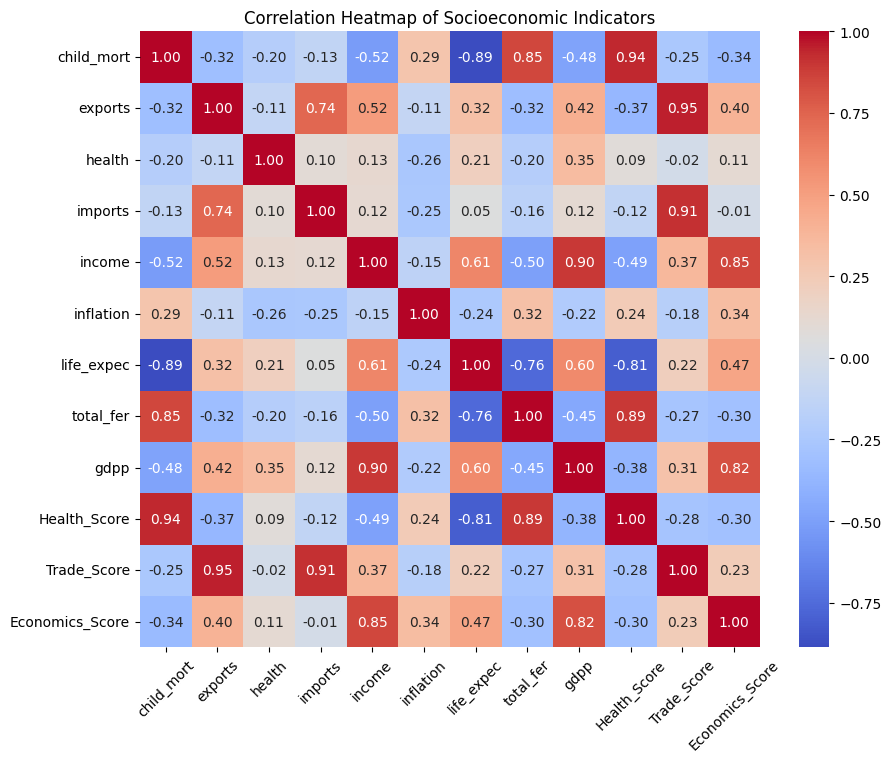

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Socioeconomic Indicators')
plt.show()


Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

*   Health_Score, Trade_Score, Economics_Score =
These are the features that was dervied from the features to create an "overall score" for each countries health, trade, and econmics. We can see that each of the scores strongly correlated with each of their respective dervied feature, the three measures a country's economic state and indicating they measure closely related aspects of a country’s economic performance



In [21]:
import plotly.express as px
fig = px.scatter_3d(df1, x='Health_Score', y='Trade_Score', z='Economics_Score',
                    title='3D Model')
fig.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Distance')

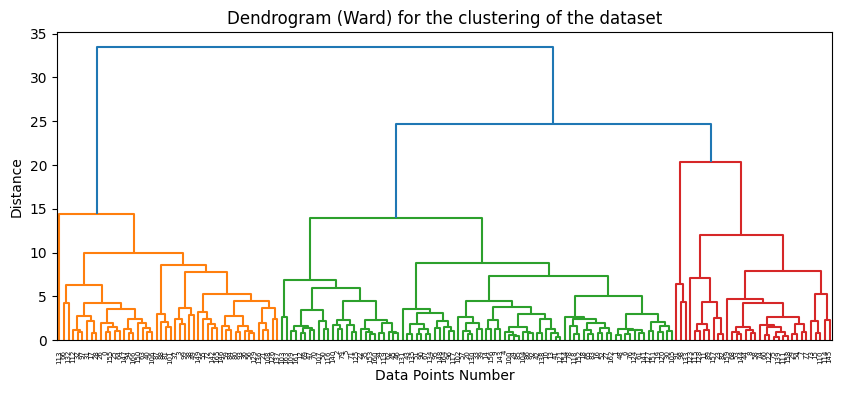

In [24]:
Z = sch.linkage(df_standard, method = 'ward')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Ward) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Distance')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [26]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage= 'ward')
# Model Fit
model_clt = cluster_H.fit(df_standard)
print(model_clt)
print('\n')

df1['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(df1['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 3 :
0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Name: clusters, Length: 167, dtype: int64


## 7. Visualizing Cluster Results

Create a scatter plot using any 2-3 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?



In [30]:
fig = px.scatter_3d(df1, x='Health_Score', y='Trade_Score', z='Economics_Score', color='clusters')
fig.show()

* A Cluster that can be said that is in the higher side in income wise are countries that are more developed and have more income, and income, hence providing better healthcare and education, but having lower ferility rate.

*   Middle clusters or can be said the developing countries are in the middle of all, wherein the income of many are just enough for their daily lives, and has a medium health and life expectancy. Overall having average scores throughout the features.

*   Lower cluster or underdeveloped countries are, can be said as struggling countries income wise, and also health. Higher fertility rate is an issue where the lack of family planning and the lack of providing the neccesity needs hinders a country.



## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


The hierarchical clustering showed that countries dervied with high Health_Score, strong Economics_Score, and good Trade_Scores levels usually group together, meaning these factors often go in more developed nations. Another cluster showed countries with medium trade, and overall having an average scores throughout, while the last cluster had countries with low scores in health, trade, and economics, showing signs of slower development. Overall, the clusters make it clear that better health and stronger economies often appear together, while countries with lower scores still face bigger development challenges.